# PRiAD 5 - test zaliczający

Test obejmuje materiał z ćwiczenia PRiAD5. 

---
**Imię, nazwisko i numer indeksu:** (tu wpisz swoje imię, nazwisko i numer indeksu)

> **Zadanie 1** Znajdź najlepszy klasyfikator dla zbioru `iris`. Zbadaj wszystkie poznane klasyfikatory, w przypadku klasyfikatora $k$-NN przyjmij trzy wartości $k$. 

In [11]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree

<Figure size 1000x800 with 0 Axes>

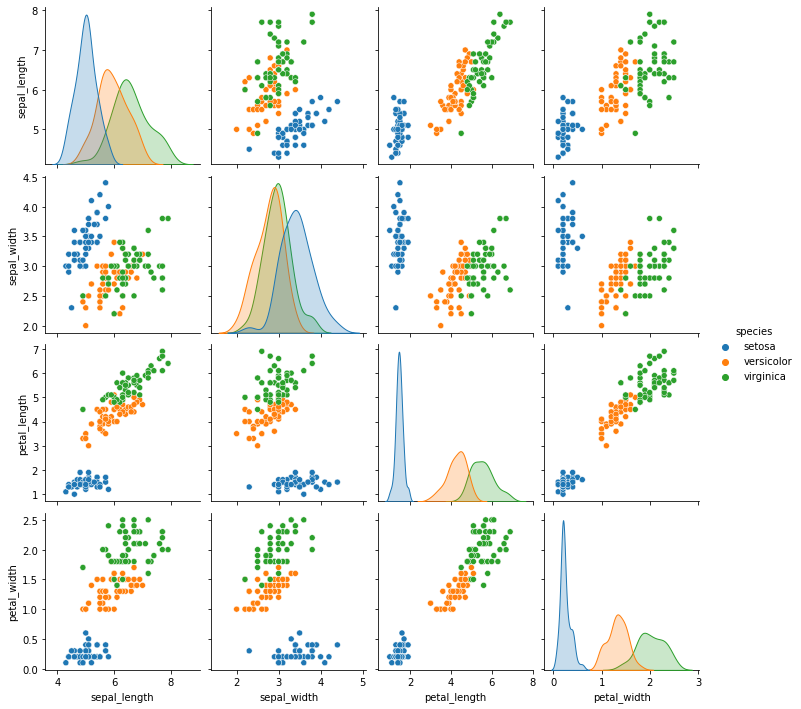

<Figure size 1000x800 with 0 Axes>

In [12]:
df = pd.read_csv('iris.csv')
df = df.drop(columns = ['Unnamed: 0'])
sns.pairplot(df, kind="scatter", hue = "species")
kor = df.corr()
plt.figure(figsize=(10,8),dpi = 100)


* Na podstawie macierzy korelacji, możemy stwierdzić, że dwa najlepsze atrybuty w zbiorze iris to petal_length oraz petal_width (pozwalają one na najlepsze rozróżnienie klas), z tego powodu skorzystam z nich przy wyborze najlepszego klasyfikatora.

In [13]:
def podziel(df,proporcja):
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

def weryfikuj(model,dane,atryb):
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    print("Macierz pomyłek dla zbioru uczącego")
    print(pd.crosstab(dane["dec_ucz"],wynik_ucz)) 
    print("Macierz pomyłek dla zbioru testowego")
    print(pd.crosstab(dane["dec_test"],wynik_test)) 
    
def granice(model,dane,atr_x, atr_y,tytul,kontur = 1):
    if (kontur == 1):    
        model.fit(dane["opis_ucz"].iloc[:,[atr_x,atr_y]], dane["dec_ucz"])
        x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
        x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
        y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
        y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 100)
    plt.title(tytul)
    if (kontur == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')

Liczba obiektów zbioru uczącego:  97
Liczba obiektów zbioru testowego:  53


C:\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



Macierze pomyłek dla 1NN:
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      30   0   0
1       0  32   0
2       0   1  34
Macierz pomyłek dla zbioru testowego
col_0   0   1   2
row_0            
0      20   0   0
1       0  18   0
2       0   2  13


C:\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



Macierze pomyłek dla 3NN:
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      30   0   0
1       0  31   1
2       0   1  34
Macierz pomyłek dla zbioru testowego
col_0   0   1   2
row_0            
0      20   0   0
1       0  18   0
2       0   1  14


C:\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



Macierze pomyłek dla 5NN:
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      30   0   0
1       0  29   3
2       0   2  33
Macierz pomyłek dla zbioru testowego
col_0   0   1   2
row_0            
0      20   0   0
1       0  18   0
2       0   1  14


C:\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



Macierze pomyłek dla 9NN:
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      30   0   0
1       0  29   3
2       0   2  33
Macierz pomyłek dla zbioru testowego
col_0   0   1   2
row_0            
0      20   0   0
1       0  18   0
2       0   1  14


Macierze pomyłek dla metody najbliższego prototypu
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      30   0   0
1       0  30   2
2       0   4  31
Macierz pomyłek dla zbioru testowego
col_0   0   1   2
row_0            
0      20   0   0
1       0  18   0
2       0   2  13


Macierze pomyłek dla klasyfikatora Bayesa
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      30   0   0
1       0  30   2
2       0   2  33
Macierz pomyłek dla zbioru testowego


C:\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but NearestCentroid was fitted with feature names
  warnings.warn(
C:\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


col_0   0   1   2
row_0            
0      20   0   0
1       0  18   0
2       0   1  14


Macierze pomyłek dla drzewa decyzyjnego

Metoda drzewa decyzyjnego o głębokości 2
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      30   0   0
1       0  31   1
2       0   3  32
Macierz pomyłek dla zbioru testowego
col_0   0   1   2
row_0            
0      20   0   0
1       0  18   0
2       0   2  13

Metoda drzewa decyzyjnego o głębokości 3
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      30   0   0
1       0  30   2
2       0   1  34
Macierz pomyłek dla zbioru testowego
col_0   0   1   2
row_0            
0      20   0   0
1       0  18   0
2       0   2  13

Metoda drzewa decyzyjnego o głębokości 4
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      30   0   0
1       0  32   0
2       0   2  33
Macierz pomyłek dla zbioru testowego
col_0   0   1   2
row_0            
0      20   0   0
1       0  18   0
2

C:\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


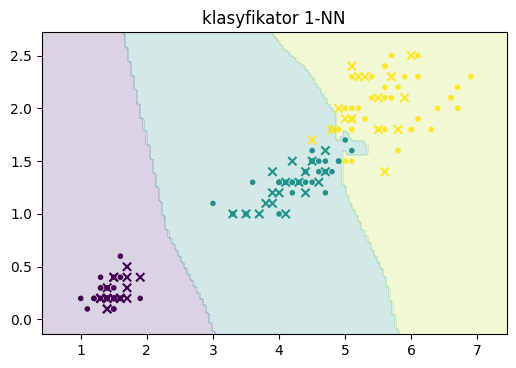

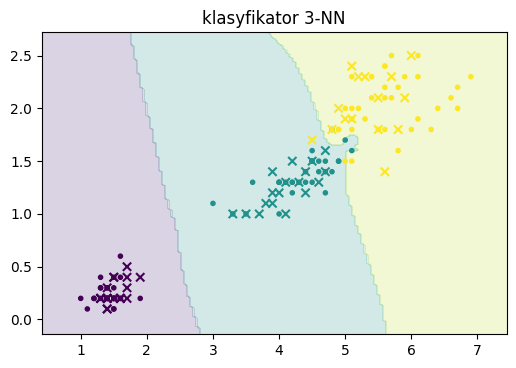

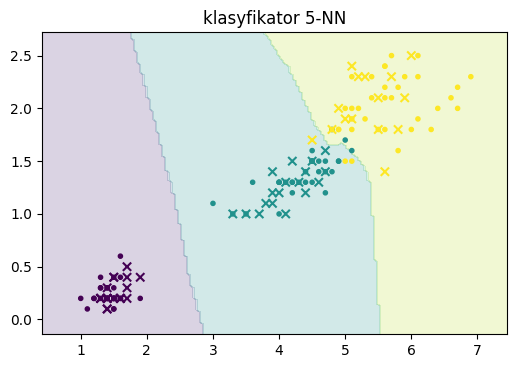

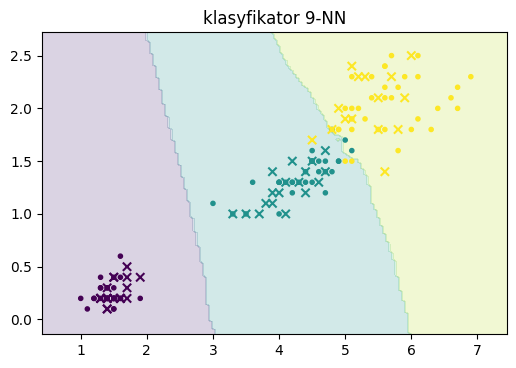

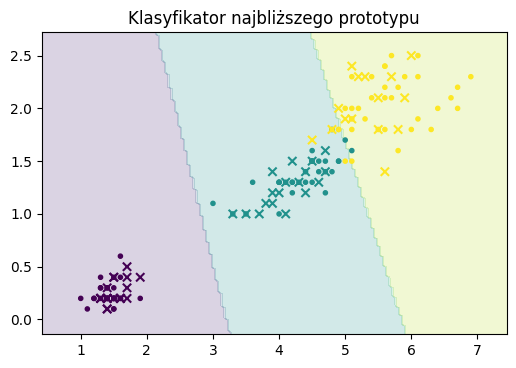

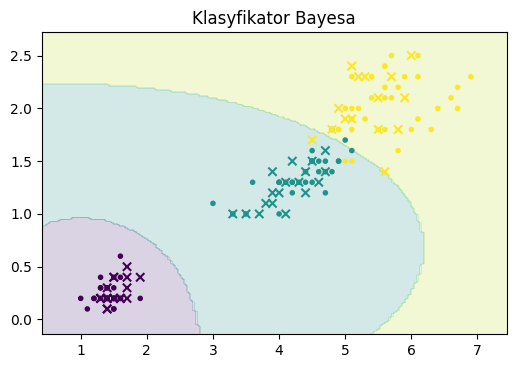

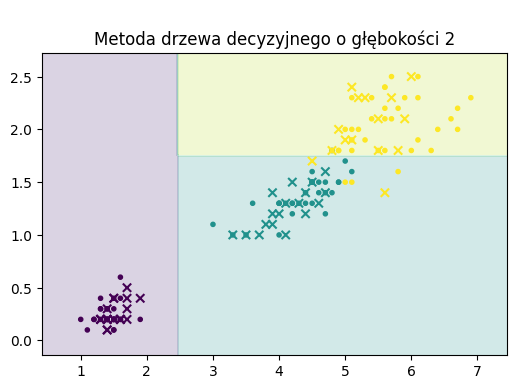

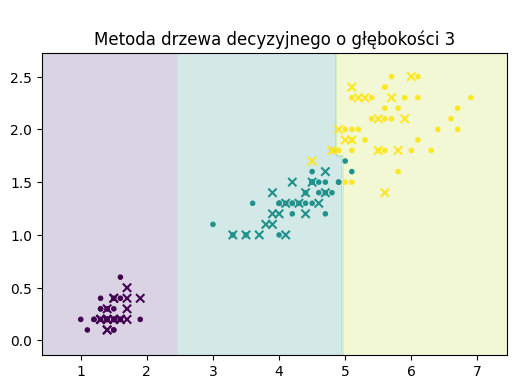

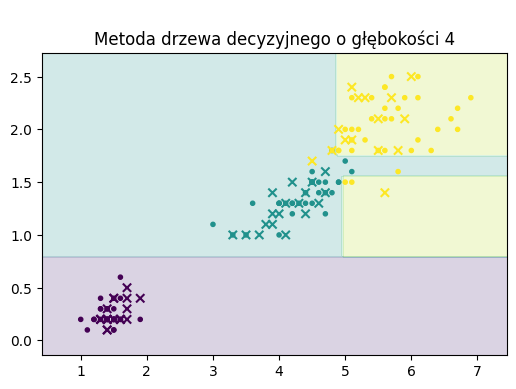

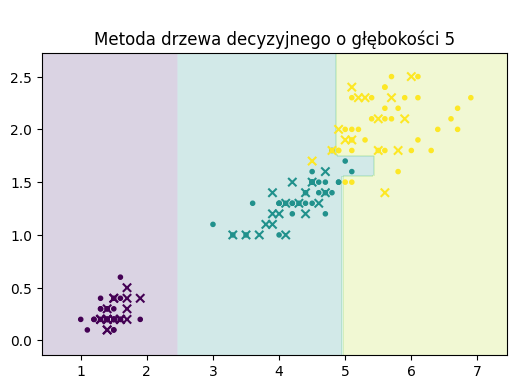

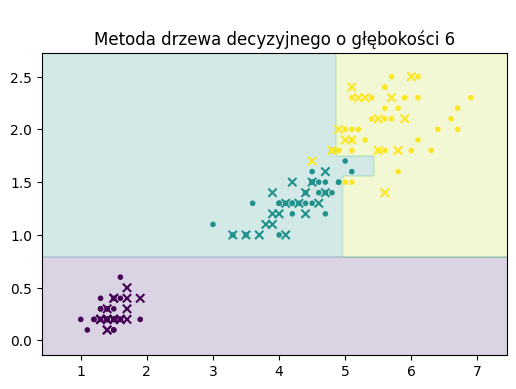

In [14]:
df = podziel(df,0.35)
print('Liczba obiektów zbioru uczącego: ', len(df["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(df["opis_test"]))

for k in [1,3,5,9]:
    model = KNeighborsClassifier(n_neighbors=k)
    granice(model,df,2,3,"klasyfikator " + str(k)+ "-NN")
    print('\nMacierze pomyłek dla ' + str(k) + 'NN:')
    weryfikuj(model,df,[2,3])

print('\n\nMacierze pomyłek dla metody najbliższego prototypu')
model = NearestCentroid()
granice(model,df,2,3,"Klasyfikator najbliższego prototypu")
weryfikuj(model,df,[2,3])

print('\n\nMacierze pomyłek dla klasyfikatora Bayesa')
model = GaussianNB()
granice(model,df,2,3,"Klasyfikator Bayesa")
weryfikuj(model,df,[2,3])

print('\n\nMacierze pomyłek dla drzewa decyzyjnego')
for g in [2,3,4,5,6]:
    model = tree.DecisionTreeClassifier(max_depth=g)
    tekst = "\nMetoda drzewa decyzyjnego o głębokości " + str(g)
    print(tekst)
    granice(model,df,2,3,tekst)
    weryfikuj(model,df,[2,3])

Wnioski (który klasyfikator jest najlepszy i dlaczego - w uzasadnieniu odnieś się do otrzymanych powyżej wyników):
* W zadaniu możemy zauważyć, że większość klasyfikatorów cechuje się stosunkowo małą liczbą błędów i są one satysfakcjonujące (może wynikać to z wyboru atrybutów, które dobrze dzielą klasy)
* Najgorszym klasyfikatorem jest klasyfikator najbliższego prototypu, widzimy tutaj najwięcej błędów
* Najlepszymi klasyfikatorami okazały się metody k-NN dla k=1 oraz k=3, a także metody drzewa decyzyjnego o głębokości równej 5 i 6.

> **Zadanie 2** (niepunktowane) Zmień nazwę tego skryptu na następującą "PRiAD5_Imię_Nazwisko.ipynb" i wgraj wgraj go do ISOD-a we wskazane miejsce, nie przekraczając wyznaczonego terminu.